In [1]:
import h5py
from pathlib import Path
import numpy as np
import pandas as pd
import spatialdata as sd
import scanpy as sc
from scipy.sparse import issparse


/srv/scratch/lottep/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
/srv/scratch/lottep/anaconda3/envs/napari-spongepy/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [19]:
adata=sc.read('/srv/scratch/lottep/RESOLVE/Data_Martin/liverAtlas/adataAtlasFull.h5ad')


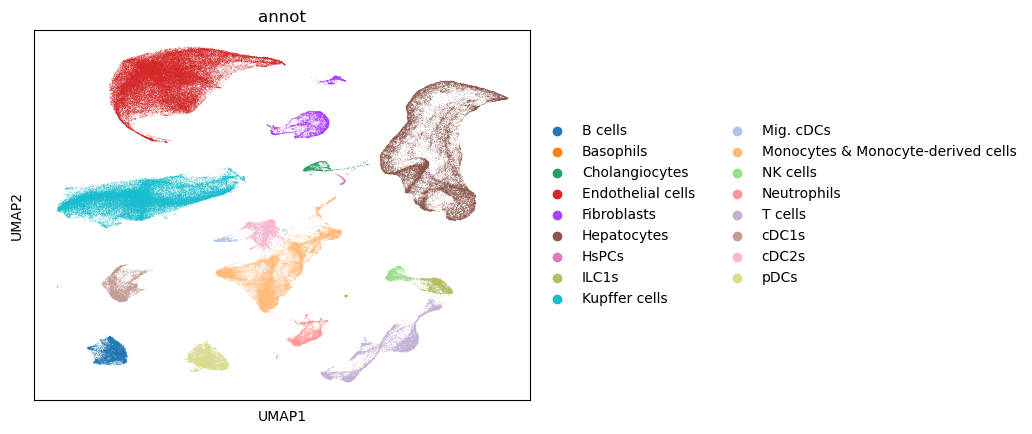

In [20]:
sc.pl.umap(adata,color='annot')

In [21]:
adata_nuc=adata[adata.obs.typeSample=='nucSeq']

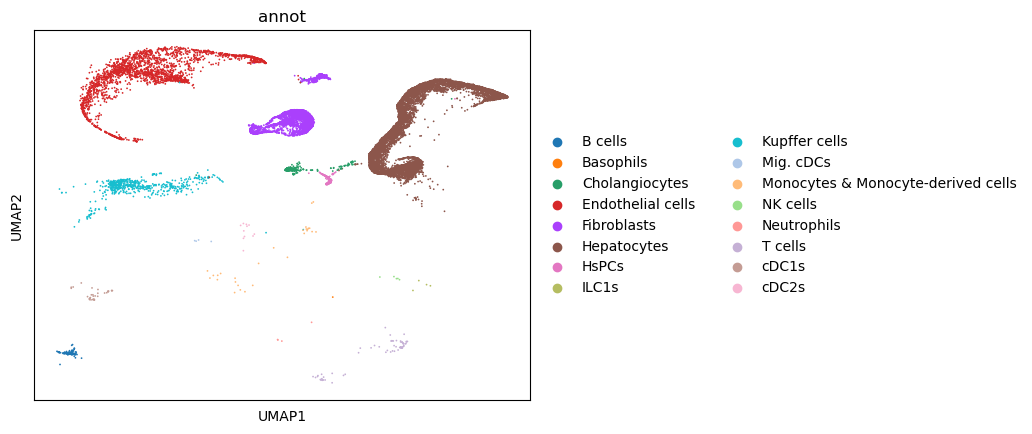

In [22]:
sc.pl.umap(adata_nuc,color='annot')

In [23]:
myeloid=pd.read_csv('/srv/scratch/lottep/RESOLVE/Data_Martin/liverAtlas/annot_mouseStStMyeloid.csv') # no need
lymphoid=pd.read_csv('/srv/scratch/lottep/RESOLVE/Data_Martin/liverAtlas/annot_mouseStStLymphoid.csv') # no need 

In [24]:
Fibro=pd.read_csv('/srv/scratch/lottep/RESOLVE/Data_Martin/liverAtlas/annot_mouseStStFibro.csv')# no need 
CDNeg=pd.read_csv('/srv/scratch/lottep/RESOLVE/Data_Martin/liverAtlas/annot_mouseStStCD45neg.csv')

In [25]:
CDNeg=CDNeg.set_index('cell')
CDNeg=CDNeg.rename(columns={'annot':'annotation_CD45Neg'})

In [26]:
np.unique(CDNeg.annotation_CD45Neg)

array(['Capsular Fibroblasts', 'Central Vein Endothelial cells',
       'Cholangiocytes', 'Fibroblasts', 'Hepatocytes',
       'Hepatocytes NucSeq', 'HsPCs', 'LSECs',
       'Lymphatic Endothelial cells', 'Mesothelial cells',
       'Portain Vein Endothelial cells', 'Stellate cells'], dtype=object)

In [27]:
Fibro=Fibro.set_index('cell')
Fibro=Fibro.rename(columns={'annot':'annotation_Fibro'})

In [28]:
adata.obs.loc[Fibro[Fibro.annotation_Fibro=='VSMCs'].index]

,annot,typeSample,cluster_orig
cell,,,
AGGTTGTCATGTTCGA-5,Fibroblasts,scRnaSeq,41
AGTGATCAGCTTTGTG-5,Fibroblasts,scRnaSeq,41
TGACGCGTCTCCTGAC-9,Fibroblasts,scRnaSeq,41
TTCATTGCACTGATTG-15,Fibroblasts,scRnaSeq,41
CGGCAGTTCCCGTAAA-20,Fibroblasts,citeSeq,41
...,...,...,...
GTCAAACAGCGCTGAA-38,Fibroblasts,nucSeq,41
TATTGGGGTTCAAAGA-38,Fibroblasts,nucSeq,41
TCAGGTAAGTCCCTAA-38,Fibroblasts,nucSeq,41


In [29]:
adata.obs=pd.concat([adata.obs,CDNeg['annotation_CD45Neg']],axis=1,names='annotation_CD45Neg')
adata.obs=pd.concat([adata.obs,Fibro['annotation_Fibro']],axis=1,names='annotation_Fibro')
adata.obs['annotation']=adata.obs['annotation_Fibro']

In [30]:
adata.obs.annotation.fillna(adata.obs.annotation_CD45Neg,inplace=True)
adata.obs.annotation.fillna(adata.obs.annot,inplace=True)

In [34]:
adata.obs['annotation']=adata.obs['annotation'].replace(['Basophils','Mig. cDCs','Monocytes & Monocyte-derived cells', 'NK cells', 'Neutrophils', 'T cells','cDC1s', 'cDC2s', 'pDCs','ILC1s'],'Other_ImmuneCells')
adata.obs['annotation']=adata.obs['annotation'].replace(['Capsular Fibroblasts','Capsule fibroblasts','Fibroblasts','Fibroblast 1', 'Fibroblast 2','fibroblasts'],'fibroblast')
adata.obs['annotation']=adata.obs['annotation'].replace([ 'Central Vein Endothelial cells'],'central_vein_EC45')
adata.obs['annotation']=adata.obs['annotation'].replace([ 'Hepatocytes NucSeq'],'Hepatocytes')
adata.obs['annotation']=adata.obs['annotation'].replace([ 'Lymphatic Endothelial cells'],'LECs')
adata.obs['annotation']=adata.obs['annotation'].replace([ 'Portain Vein Endothelial cells'],'portal_vein_EC45')
adata.obs['annotation']=adata.obs['annotation'].replace([ 'Stellate cells'],'stellate')
adata.obs['annotation']=adata.obs['annotation'].replace([ 'VSMCs'],'VSMC')



In [32]:
np.unique(adata.obs.annotation)

array(['B cells', 'Cholangiocytes', 'Endothelial cells', 'Hepatocytes',
       'HsPCs', 'Kupffer cells', 'LECs', 'LSECs', 'Mesothelial cells',
       'Other_ImmuneCells', 'VSMCs', 'central_vein_EC45', 'fibroblast',
       'portal_vein_EC45', 'stellate'], dtype=object)

In [35]:
adata.write_h5ad('/srv/scratch/lottep/RESOLVE/Data_Martin/liverAtlas/adataAtlasRESOLVE.h5ad')

In [14]:
adata.obs['annotation']=adata.obs['annot']

In [15]:
np.unique(myeloid.annot)

array(['KCs', 'Mig. cDCs', 'MoMac1', 'MoMac2', 'Monocytes',
       'Patrolling Monocytes', 'Peritoneal Macrophages',
       'Trans. Monocytes', 'Trans. Monocytes 2', 'cDC1s', 'cDC2s'],
      dtype=object)

In [16]:
np.unique(lymphoid.annot)

array(['B cells', 'CD8 Effector Memory T cells', 'CTLs', 'ILC1s',
       'NK cells', 'NKT cells', 'Naïve CD4+ T cells',
       'Naïve CD8+ T cells', 'TRegs', 'Th17 cells', 'Th1s', 'pDCs'],
      dtype=object)

In [22]:
np.unique(Fibro.annot)

array(['Capsule fibroblasts', 'Fibroblast 1', 'Fibroblast 2',
       'Mesothelial cells', 'Stellate cells', 'VSMCs'], dtype=object)

In [23]:
np.unique(CDNeg.annot)

array(['Capsular Fibroblasts', 'Central Vein Endothelial cells',
       'Cholangiocytes', 'Fibroblasts', 'Hepatocytes',
       'Hepatocytes NucSeq', 'HsPCs', 'LSECs',
       'Lymphatic Endothelial cells', 'Mesothelial cells',
       'Portain Vein Endothelial cells', 'Stellate cells'], dtype=object)